In [13]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.nn.functional as F 
from torchvision import transforms, datasets

In [14]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else :
  DEVICE = torch.device('cpu')
print(torch.cuda.get_device_name())

NVIDIA GeForce GTX 1650


In [15]:
print('Using Pytorch version:', torch.__version__, ' Device: ', DEVICE)

Using Pytorch version: 1.12.0  Device:  cuda


In [16]:
BATCH_SIZE = 32
EPOCHS = 10

In [17]:
train_dataset = datasets.MNIST(root='../data/MNIST',
                                train = True,
                                download=True,
                                transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root='../data/MNIST',
                                train = False,
                                download=True,
                                transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle= False)
                          

In [18]:
for (X_train, y_train) in train_loader :
  print('X_train', X_train.size(), 'type', X_train.type())
  print('y_train', y_train.size(), 'type', y_train.type())
  break


X_train torch.Size([32, 1, 28, 28]) type torch.FloatTensor
y_train torch.Size([32]) type torch.LongTensor


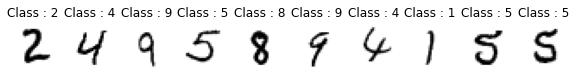

In [23]:
pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28,28), cmap = 'gray_r')
  plt.title('Class : ' + str(y_train[i].item()))

In [24]:
len(y_train.unique())

9

In [25]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)


  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=-1)
    return x


In [27]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [33]:
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()


    if batch_idx % log_interval == 0 :
      print('Train Epoch:, {}, [{} / {} ({:.0f}%)]\tTrain Loss : {:.6f}'.format(
        Epoch, batch_idx * len(image),
        len(train_loader.dataset), 100. * batch_idx / len(train_loader),
        loss.item()
      ))

In [29]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output = model(image)
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len (test_loader.dataset)
  return test_loss, test_accuracy

In [34]:
for Epoch in range(1, EPOCHS + 1 ):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print('\n[EPOCH: {}, \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n'.
  format(Epoch, test_loss, test_accuracy))  

Train Epoch:, 1, [0 / 60000 (0%)]	Train Loss : 2.309923
Train Epoch:, 1, [6400 / 60000 (11%)]	Train Loss : 1.917031
Train Epoch:, 1, [12800 / 60000 (21%)]	Train Loss : 0.809437
Train Epoch:, 1, [19200 / 60000 (32%)]	Train Loss : 0.443854
Train Epoch:, 1, [25600 / 60000 (43%)]	Train Loss : 0.650296
Train Epoch:, 1, [32000 / 60000 (53%)]	Train Loss : 0.327001
Train Epoch:, 1, [38400 / 60000 (64%)]	Train Loss : 0.293532
Train Epoch:, 1, [44800 / 60000 (75%)]	Train Loss : 0.491509
Train Epoch:, 1, [51200 / 60000 (85%)]	Train Loss : 0.349485
Train Epoch:, 1, [57600 / 60000 (96%)]	Train Loss : 0.297130

[EPOCH: 1, 	Test Loss: 0.0097, 	Test Accuracy: 91.17 %

Train Epoch:, 2, [0 / 60000 (0%)]	Train Loss : 0.240310
Train Epoch:, 2, [6400 / 60000 (11%)]	Train Loss : 0.271439
Train Epoch:, 2, [12800 / 60000 (21%)]	Train Loss : 0.344508
Train Epoch:, 2, [19200 / 60000 (32%)]	Train Loss : 0.443133
Train Epoch:, 2, [25600 / 60000 (43%)]	Train Loss : 0.230045
Train Epoch:, 2, [32000 / 60000 (53%)]	T